# General Instructions to students:

1. There are 4 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages, unless needed.

4. The code is to be written in Python 3.x syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/printed.

6. If TextWrite cells ask you to give accuracy/error/other numbers, you can print them on the code cells, but remove the print statements before submitting.

7. Any runtime failures on the submitted notebook will get zero marks.

8. All code must be written by you. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

10. All plots must be labelled properly, the labels/legends should be readable, all tables must have rows and columns named properly.

11. Change the name of file with your roll no. For example cs15d203.ipynb (for notebook) and cs15d203.py (for plain python script)



In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/Classes/PRML

Mounted at /content/drive
/content/drive/MyDrive/Classes/PRML


In [2]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

You are supposed to build Bayesian classifiers that model each class using multivariate Gaussian density functions for the datasets assigned to you (under assumptions below and employing MLE approach to estimate class prior/conditional densities). This assignment is focused on handling
and analyzing data using interpretable classification models, rather than aiming solely for the best classification accuracy.

Build Bayesian models for the given case numbers (you may refer to the Chapter 2 of the book “Pattern Classification" by David G. Stork, Peter E. Hart, and Richard O. Duda):

**Case 1:** Bayes classifier with the same Covariance matrix for all classes.

**Case 2:** Bayes classifier with different Covariance matrix across classes.

**Case 3:** Naive Bayes classifier with the Covariance matrix S = $σ^2I$ same for all classes.

**Case 4:** Naive Bayes classifier with S of the above form, but being different across classes.

Refer to the provided dataset for each group, which can be found [here](https://drive.google.com/drive/folders/1NmqA9lkxXayVaCzEfRgSxSxCYSa0LEZu?usp=sharing). Each dataset includes 2D feature vectors and their corresponding class labels. There are two different datasets available:
1) Linearly separable data.
2) Non-linearly separable data.

There are 41 folders in each dataset, but you need to look at only one folder -- **the folder number assigned to you** being *RollNo\%41 + 1*.

Sample plots: [link](https://drive.google.com/drive/folders/1jhauePXVWVnmUEkmZeutuhlzosTRz1sU)




In [3]:
# Cell type : CodeWrite

def estimateMean(data):
    """ Find the ML estimate of the mean of n-dimensional data points belonging to a class.

    Arguments:
    data: 2d array containing features

    Returns:
    meanData: mean of the n-dimensional data points

    """
    return np.mean(data,axis = 0)

def estimateCovariance(data):
    """ Find the ML estimate of the covariance matrix of n-dimensional data points.

    Arguments:
    data: 2d array containing features

    Returns:
    covData: covariance of the n-dimensional data points

    """
    return np.cov(data,rowvar =False)

def computeLikelihood(dataPoint, meanData, covData):
    """ Computes the likelihood score of a data point with respect to a given class
    given the class' mean and covariance matrix

    Arguments:
    dataPoint: an n-dimensional feature vector
    meanData: mean of the class
    covData: covariance matrix of the class

    Returns:
    likelihood: likelihood score of the data point wrt the given class

    """
    n = len(meanData)
    x_minus_mean = dataPoint - meanData
    cov_inverse = np.linalg.inv(covData)
    det_cov = np.linalg.det(covData)
    coeff = 1.0 / (np.sqrt((2 * np.pi) ** n * det_cov))
    exponent = -0.5 * \
        np.dot(np.dot(x_minus_mean.T, cov_inverse), x_minus_mean)
    return coeff * np.exp(exponent)





In [4]:
# Cell type : CodeWrite
# write your code here as instructed.
# (Use the functions written previously)


# Read the train data
def read_data(filename):
    data = []
    with open(filename, 'r') as f:
        for line in f.readlines():
            line = line.replace('\n', '').split(',')
            line = list(map(float, line))
            data.append(line)
    return np.array(data)[:, :-1],np.array(data)[:, -1]

lin_train_x,lin_train_y = read_data('Linear/train.txt')
nlin_train_x,nlin_train_y = read_data('NonLinear/train.txt')


# Compute the mean and the covariance matrices as per the 4 cases mentioned above
print("Mean of linear data")
print(estimateMean(lin_train_x))
print("Covariance of linear data")
print(estimateCovariance(lin_train_x))
print()
print("Mean of non-linear data")
print(estimateMean(nlin_train_x))
print("Covariance of non-linear data")
print(estimateCovariance(nlin_train_x))

Mean of linear data
[5.8349843  8.64818428]
Covariance of linear data
[[27.91269631  2.62266227]
 [ 2.62266227 20.11624702]]

Mean of non-linear data
[18.62084942 21.41619975]
Covariance of non-linear data
[[117.60245428  42.96895143]
 [ 42.96895143  48.28530347]]


In [5]:
# Cell type : CodeWrite
# write your code here as instructed.
# (Use the functions written previously)

# Read the test data (dev.txt)
lin_dev_x,lin_dev_y = read_data('Linear/dev.txt')
nlin_dev_x,nlin_dev_y = read_data('NonLinear/dev.txt')



In [6]:
# Cell type : CodeWrite
# write your code here as instructed.
# (Use the functions written previously)

# The plot of Gaussian pdfs for all classes estimated using the train data (train.txt).
# Refer to sample plots 1 and 3
# (4 Cases x 2 Datasets = 8 plots)

class Classifier1:
    def __init__(self, train_x, train_y):
        self.num_features = len(train_x[0])
        self.classes = np.unique(train_y)
        self.class_count = [np.sum(train_y == i) for i in self.classes]

        self.means = {}
        self.covars = {}
        self.priors = {}

        for idx, c in enumerate(self.classes):
            X_c = train_x[train_y == c]
            self.means[c] = X_c.mean(axis=0)
            self.covars[c] = np.cov(X_c, rowvar=False)
            self.priors[c] = len(X_c)/len(train_x)

        for c in self.classes[1:]:
            self.covars[c] = self.covars[self.classes[0]]

    def multivariate_gaussian_pdf(self, x, mean, cov_matrix):
        n = len(mean)
        x_minus_mean = x - mean
        cov_inverse = np.linalg.inv(cov_matrix)
        det_cov = np.linalg.det(cov_matrix)
        coeff = 1.0 / (np.sqrt((2 * np.pi) ** n * det_cov))
        exponent = -0.5 * \
            np.dot(np.dot(x_minus_mean.T, cov_inverse), x_minus_mean)
        return coeff * np.exp(exponent)

    def predict(self, X):
        predictions = []
        for x in X:
            class_scores = {}
            for cls in self.classes:
                mean = self.means[cls]
                cov_matrix = self.covars[cls]
                prior = self.priors[cls]
                pdf = self.multivariate_gaussian_pdf(x, mean, cov_matrix)
                class_scores[cls] = pdf * prior
            predicted_class = max(class_scores, key=class_scores.get)
            predictions.append(predicted_class)
        return predictions

class Classifier2:
    def __init__(self, train_x, train_y):
        self.num_features = len(train_x[0])
        self.classes = np.unique(train_y)
        self.class_count = [np.sum(train_y == i) for i in self.classes]

        self.means = {}
        self.covars = {}
        self.priors = {}

        for idx, c in enumerate(self.classes):
            X_c = train_x[train_y == c]
            self.means[c] = X_c.mean(axis=0)
            self.covars[c] = np.cov(X_c, rowvar=False)
            self.priors[c] = len(X_c)/len(train_x)

    def multivariate_gaussian_pdf(self, x, mean, cov_matrix):
        n = len(mean)
        x_minus_mean = x - mean
        cov_inverse = np.linalg.inv(cov_matrix)
        det_cov = np.linalg.det(cov_matrix)
        coeff = 1.0 / (np.sqrt((2 * np.pi) ** n * det_cov))
        exponent = -0.5 * \
            np.dot(np.dot(x_minus_mean.T, cov_inverse), x_minus_mean)
        return coeff * np.exp(exponent)

    def predict(self, X):
        predictions = []
        for x in X:
            class_scores = {}
            for cls in self.classes:
                mean = self.means[cls]
                cov_matrix = self.covars[cls]
                prior = self.priors[cls]
                pdf = self.multivariate_gaussian_pdf(x, mean, cov_matrix)
                class_scores[cls] = pdf * prior
            predicted_class = max(class_scores, key=class_scores.get)
            predictions.append(predicted_class)
        return predictions

class Classifier3:
    def __init__(self, train_x, train_y):
        self.num_features = len(train_x[0])
        self.classes = np.unique(train_y)
        self.class_count = [np.sum(train_y == i) for i in self.classes]

        self.means = {}
        self.covars = {}
        self.priors = {}

        for idx, c in enumerate(self.classes):
            X_c = train_x[train_y == c]
            self.means[c] = X_c.mean(axis=0)
            self.covars[c] = np.var(X_c, axis=0)*np.eye(self.num_features)
            self.priors[c] = len(X_c)/len(train_x)

        for c in self.classes[1:]:
            self.covars[c] = self.covars[self.classes[0]]

    def multivariate_gaussian_pdf(self, x, mean, cov_matrix):
        n = len(mean)
        x_minus_mean = x - mean
        cov_inverse = np.linalg.inv(cov_matrix)
        det_cov = np.linalg.det(cov_matrix)
        coeff = 1.0 / (np.sqrt((2 * np.pi) ** n * det_cov))
        exponent = -0.5 * \
            np.dot(np.dot(x_minus_mean.T, cov_inverse), x_minus_mean)
        return coeff * np.exp(exponent)

    def predict(self, X):
        predictions = []
        for x in X:
            class_scores = {}
            for cls in self.classes:
                mean = self.means[cls]
                cov_matrix = self.covars[cls]
                prior = self.priors[cls]
                pdf = self.multivariate_gaussian_pdf(x, mean, cov_matrix)
                class_scores[cls] = pdf * prior
            predicted_class = max(class_scores, key=class_scores.get)
            predictions.append(predicted_class)
        return predictions

class Classifier4:
    def __init__(self, train_x, train_y):
        self.num_features = len(train_x[0])
        self.classes = np.unique(train_y)
        self.class_count = [np.sum(train_y == i) for i in self.classes]

        self.means = {}
        self.covars = {}
        self.priors = {}

        for idx, c in enumerate(self.classes):
            X_c = train_x[train_y == c]
            self.means[c] = X_c.mean(axis=0)
            self.covars[c] = np.var(X_c, axis=0)*np.eye(self.num_features)
            self.priors[c] = len(X_c)/len(train_x)

    def multivariate_gaussian_pdf(self, x, mean, cov_matrix):
        n = len(mean)
        x_minus_mean = x - mean
        cov_inverse = np.linalg.inv(cov_matrix)
        det_cov = np.linalg.det(cov_matrix)
        coeff = 1.0 / (np.sqrt((2 * np.pi) ** n * det_cov))
        exponent = -0.5 * \
            np.dot(np.dot(x_minus_mean.T, cov_inverse), x_minus_mean)
        return coeff * np.exp(exponent)

    def predict(self, X):
        predictions = []
        for x in X:
            class_scores = {}
            for cls in self.classes:
                mean = self.means[cls]
                cov_matrix = self.covars[cls]
                prior = self.priors[cls]
                pdf = self.multivariate_gaussian_pdf(x, mean, cov_matrix)
                class_scores[cls] = pdf * prior
            predicted_class = max(class_scores, key=class_scores.get)
            predictions.append(predicted_class)
        return predictions

def plotter(means_all, covars_all, spaces=np.linspace(-10, 30, 100)):
    fig = plt.figure(figsize=(16, 16))
    rgb = ['red', 'green', 'blue']
    for i, (mean, cov) in enumerate(zip(means_all, covars_all)):
        ax = fig.add_subplot(2, 2, i + 1, projection='3d')
        x, y = np.meshgrid(spaces, spaces)
        xy = np.column_stack([x.ravel(), y.ravel()])
        for cls in mean.keys():
            pdf_values = np.zeros(xy.shape[0])
            for j in range(xy.shape[0]):
                diff = xy[j] - mean[cls]

                pdf_values[j] = np.exp(-0.5 * np.dot(np.dot(diff.T,
                                                            np.linalg.inv(cov[cls])), diff))

            pdf_values = pdf_values.reshape(x.shape)
            ax.plot_wireframe(x, y, pdf_values, cmap='viridis',
                              color=rgb[int(cls)-1], alpha=0.8)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('PDF')
        ax.set_title(f'Distribution {i + 1}')

    plt.tight_layout()
    plt.show()

def analysis(data=read_data('Linear/train.txt')):
    classifiers = [Classifier1, Classifier2, Classifier3, Classifier4]
    train_xl, train_yl = data[0], data[1]

    means_all = []
    covars_all = []
    clfs = []

    for classifier in classifiers:
        lin_clf = classifier(train_xl, train_yl)
        # print(
        #     f'Training accuracy: {round(np.mean(lin_clf.predict(train_xl) == train_yl)*100,2)}%')
        means_all.append(lin_clf.means)
        covars_all.append(lin_clf.covars)
        clfs.append(lin_clf)
    return means_all, covars_all, clfs

lin_means_all, lin_covars_all, lin_clfs = analysis(read_data('Linear/train.txt'))
nlin_means_all, nlin_covars_all, nlin_clfs = analysis(read_data('NonLinear/train.txt'))
plotter(lin_means_all, lin_covars_all, spaces=np.linspace(-5, 20, 100))
plotter(nlin_means_all, nlin_covars_all, spaces=np.linspace(-15, 60, 100))

Output hidden; open in https://colab.research.google.com to view.

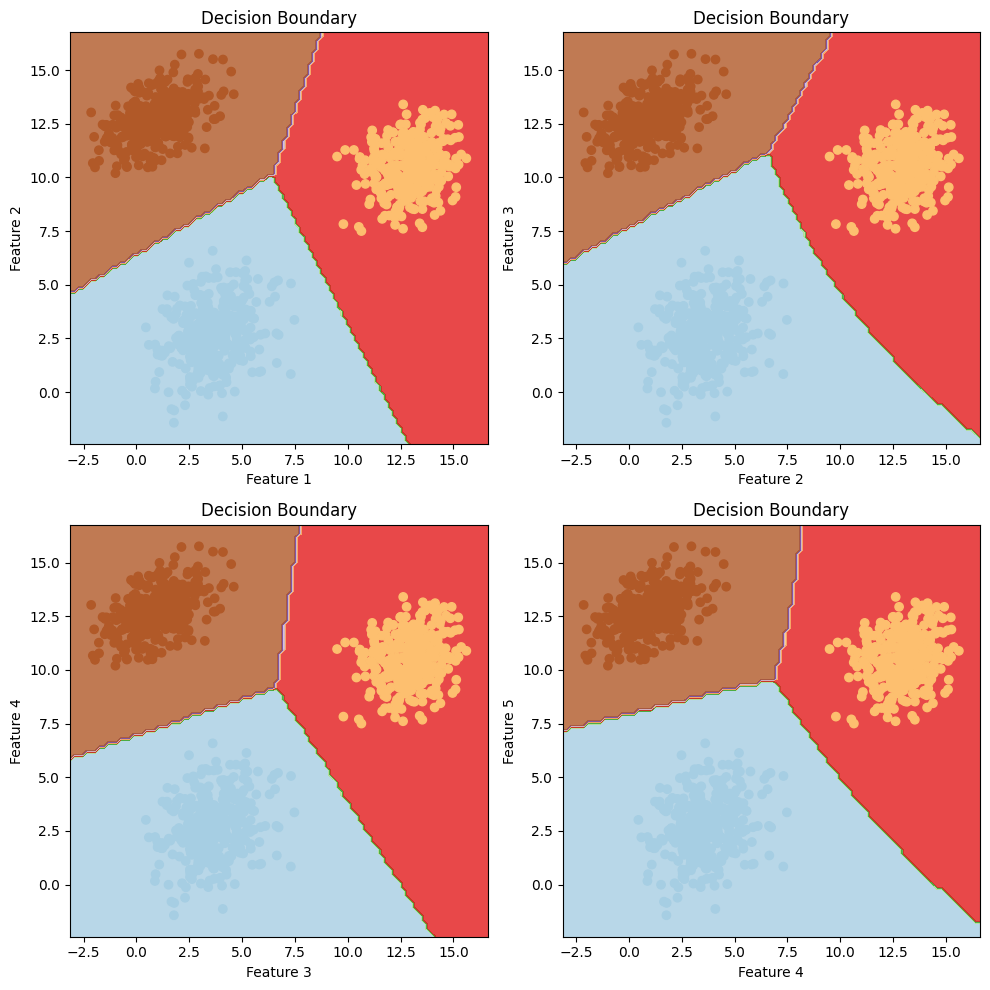

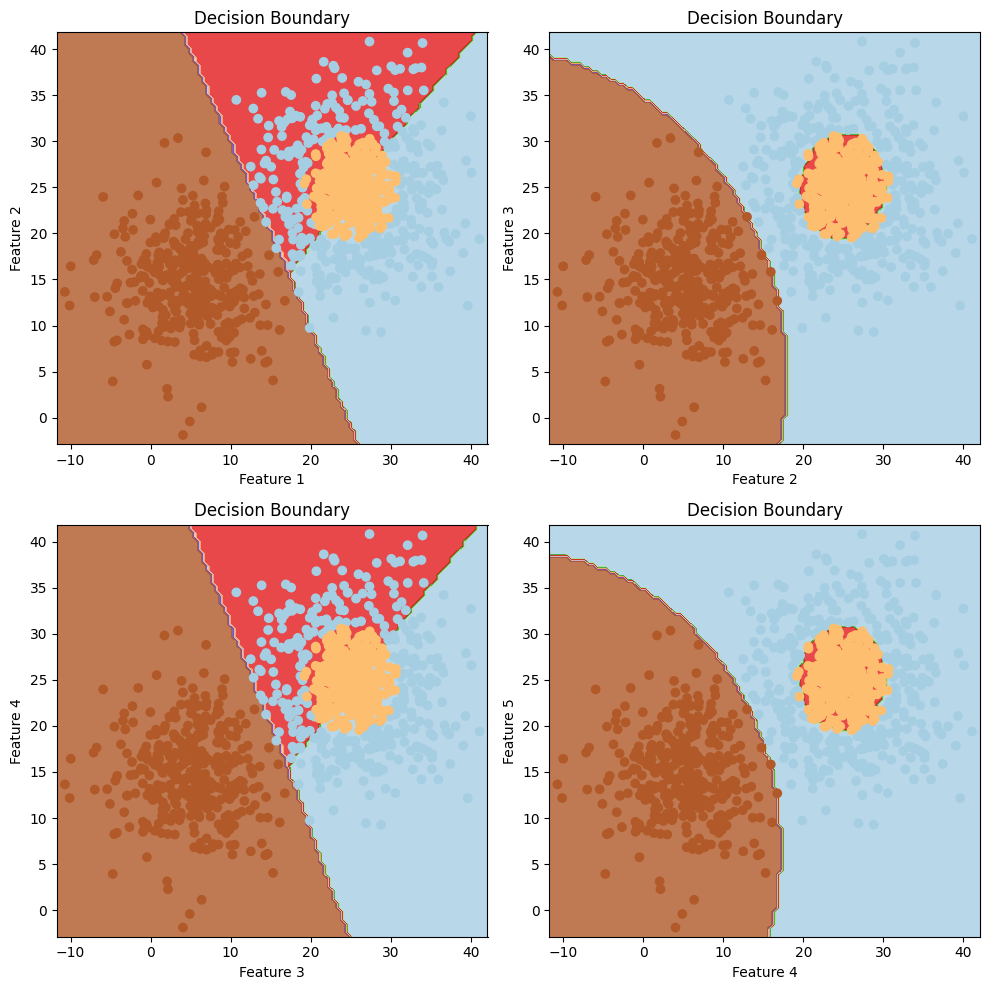

In [7]:
# Cell type : CodeWrite
# write your code here as instructed.
# (Use the functions written previously)

# The classifiers, specifically their decision boundary/surface as a 2D plot
# along with training points marked in the plot
# Linearly separable data — sample plot 4
# Non-linearly separable data — sample plot 2
#(4 Cases x 2 Datasets = 8 plots)

def plot_decision_boundary(X,y, clfs):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    for i, ax in enumerate(axes.ravel()):
        feature_pair = X
        Z = clfs[i].predict(np.c_[xx.ravel(), yy.ravel()])
        Z = np.array(Z).reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
        ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

        ax.set_xlabel(f'Feature {i+1}')
        ax.set_ylabel(f'Feature {i+2}')
        ax.set_title(f'Decision Boundary')

    plt.tight_layout()
    plt.show()

plot_decision_boundary(lin_train_x,lin_train_y, lin_clfs)
plot_decision_boundary(nlin_train_x,nlin_train_y, nlin_clfs)



In [8]:
# Cell type : CodeWrite
# write your code here as instructed.
# (Use the functions written previously)

# Report the error rates for the above classifiers
# (four classifiers on the two datasets as a 4 × 2 table
# with appropriately named rows and columns).

from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ['Model','Correct','Total']
for ind,clf in enumerate(lin_clfs):
    total = len(lin_train_x)
    correct = np.array(np.sum([clf.predict(lin_train_x) == lin_train_y]))
    x.add_row(['classifier '+str(ind),correct,total])

for ind,nclf in enumerate(nlin_clfs):
    total = len(nlin_train_x)
    correct = np.array(np.sum([nclf.predict(nlin_train_x) == nlin_train_y]))
    x.add_row(['classifier '+str(ind),correct,total])

print(x)


+--------------+---------+-------+
|    Model     | Correct | Total |
+--------------+---------+-------+
| classifier 0 |   1050  |  1050 |
| classifier 1 |   1050  |  1050 |
| classifier 2 |   1050  |  1050 |
| classifier 3 |   1050  |  1050 |
| classifier 0 |   747   |  1050 |
| classifier 1 |   1033  |  1050 |
| classifier 2 |   748   |  1050 |
| classifier 3 |   1030  |  1050 |
+--------------+---------+-------+


**Cell type : TextRead**

#### In the next Textwrite cell, answer briefly on whether we can use the most general “Case 2” for all datasets? If not, answer when a simpler model like “Case 1” is preferable over “Case 2”?



**Cell type : TextWrite**
(Write your answer here)
Yes we can use "Case 2" for most general

**Cell type : TextRead**

#### In the next Textwrite cell, summarise your observations

**Cell type : TextWrite**
(Write your observations here)

The model performs well in linear data but in non linear cases some of the classifier works well.
